In [1]:
from read_data import *
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.improve_dataset import  *
from utils.linkage import *
from utils.poincare import *

In [2]:
data_path1 = './datas/test/filtered_A35_sample.h5ad'
data_path2 = './datas/test/filtered_A36_sample.h5ad'

In [8]:
datas1 = sc.read_h5ad(data_path1)
datas2 = sc.read_h5ad(data_path2)

datas1.obs['Majority_voting_CellTypist_high'].unique()

['B cells', 'T cells', 'Monocytes', 'DC', 'ILC', ..., 'Macrophages', 'HSC/MPP', 'pDC', 'Erythroid', 'Promyelocytes']
Length: 14
Categories (14, object): ['B cells', 'Cycling cells', 'DC', 'Early MK', ..., 'Plasma cells', 'Promyelocytes', 'T cells', 'pDC']

In [9]:
import umap
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(datas1.X)

# Add UMAP coordinates to the AnnData object
datas1.obsm['X_umap'] = umap_result


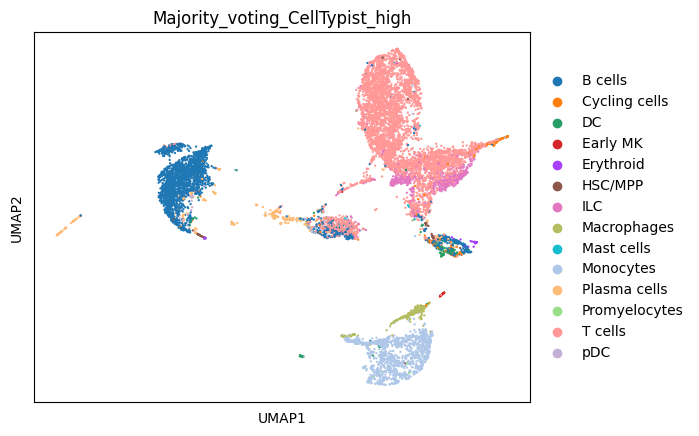

In [10]:
sc.pl.umap(datas1,color='Majority_voting_CellTypist_high')


In [11]:
import umap
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(datas2.X)

# Add UMAP coordinates to the AnnData object
datas2.obsm['X_umap'] = umap_result


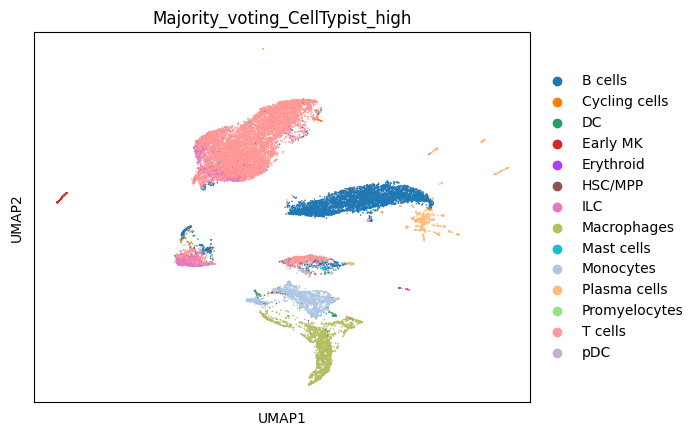

In [12]:
sc.pl.umap(datas2,color='Majority_voting_CellTypist_high')


In [17]:
metalist = ['B cells','T cells','Monocytes']
datas1 = datas1[datas1.obs['Majority_voting_CellTypist_high'].isin( metalist)]
datas1

View of AnnData object with n_obs × n_vars = 9224 × 17379
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'Age_range', 'Cell_category', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype', 'Predicted_labels_CellTypist'
    uns: 'Majority_voting_CellTypist_high_colors'
    obsm: 'X_umap'

In [18]:
metalist = ['B cells','T cells','Monocytes']
datas2 = datas2[datas2.obs['Majority_voting_CellTypist_high'].isin( metalist)]
datas2

View of AnnData object with n_obs × n_vars = 18482 × 19338
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'Age_range', 'Cell_category', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype', 'Predicted_labels_CellTypist'
    uns: 'Majority_voting_CellTypist_high_colors'
    obsm: 'X_umap'

In [25]:
datas1.obs.groupby('Majority_voting_CellTypist_high').count().min()

biosample_id                                    1376
donor_id                                        1376
species                                         1376
species__ontology_label                         1376
disease                                         1376
disease__ontology_label                         1376
organ                                           1376
organ__ontology_label                           1376
library_preparation_protocol                    1376
library_preparation_protocol__ontology_label    1376
sex                                             1376
Age_range                                       1376
Cell_category                                   1376
Majority_voting_CellTypist                      1376
Manually_curated_celltype                       1376
Predicted_labels_CellTypist                     1376
dtype: int64

In [26]:
datas1.obs['Majority_voting_CellTypist_high'].value_counts()

T cells      5054
B cells      2794
Monocytes    1376
Name: Majority_voting_CellTypist_high, dtype: int64

In [30]:

label_counts = datas1.obs['Majority_voting_CellTypist_high'].value_counts()
target_count = label_counts.min()
sampled_data = []
for label in label_counts.index:
    # 获取该聚类标签对应的索引
    label_indices = np.where(datas1.obs['Majority_voting_CellTypist_high'] == label)[0]
    
    # 随机选择目标数量的索引
    selected_indices = np.random.choice(label_indices, size=target_count, replace=False)
    
    # 提取选定的数据
    selected_data = datas1[selected_indices]
    
    # 将选定的数据添加到抽样后的数据集中
    sampled_data.append(selected_data)

# 合并抽样后的数据
sampled_data1 = sampled_data[0].concatenate(sampled_data[1:])
sampled_data1

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 4128 × 17379
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'Age_range', 'Cell_category', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype', 'Predicted_labels_CellTypist', 'batch'
    obsm: 'X_umap'

In [31]:

label_counts = datas2.obs['Majority_voting_CellTypist_high'].value_counts()
target_count = label_counts.min()
sampled_data = []
for label in label_counts.index:
    # 获取该聚类标签对应的索引
    label_indices = np.where(datas2.obs['Majority_voting_CellTypist_high'] == label)[0]
    
    # 随机选择目标数量的索引
    selected_indices = np.random.choice(label_indices, size=target_count, replace=False)
    
    # 提取选定的数据
    selected_data = datas2[selected_indices]
    
    # 将选定的数据添加到抽样后的数据集中
    sampled_data.append(selected_data)

# 合并抽样后的数据
sampled_data2 = sampled_data[0].concatenate(sampled_data[1:])
sampled_data2

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 5565 × 19338
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'Age_range', 'Cell_category', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype', 'Predicted_labels_CellTypist', 'batch'
    obsm: 'X_umap'

In [32]:
sampled_data1.write_h5ad('./datas/test/A35.h5')
sampled_data2.write_h5ad('./datas/test/A36.h5')

In [35]:
sampled_data1.obs['celltype'] = sampled_data1.obs['Majority_voting_CellTypist_high']
sampled_data2.obs['celltype'] = sampled_data2.obs['Majority_voting_CellTypist_high']

In [36]:
sampled_data1.obs['celltype']

cell
Pan_T7991588_CGGAGCTTCTTACCTA-0      T cells
Pan_T7991594_ATTGGTGTCCAATGGT-0      T cells
Pan_T7991595_TCCCGATTCACCTCGT-0      T cells
Pan_T7991594_GGACAGATCATATCGG-0      T cells
Pan_T7991589_CAGCAGCGTCAGCTAT-0      T cells
                                     ...    
Pan_T7991590_GGAGCAAAGTACGCCC-2    Monocytes
Pan_T7991593_CCTCTGACAAGTCTAC-2    Monocytes
Pan_T7991595_TTGGAACAGATCACGG-2    Monocytes
Pan_T7991595_TGCTGCTTCGCTTAGA-2    Monocytes
Pan_T7991591_CGTAGGCAGCTCCCAG-2    Monocytes
Name: celltype, Length: 4128, dtype: category
Categories (3, object): ['B cells', 'Monocytes', 'T cells']